## 1. Use iris dataset and perform the following:
1. Implement Pre-processing functions
    - check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Apply k-means clustering using the value of k=3.
3. Form the clusters.
4. Evaluate the quality of clusters formed by k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv("D:\Dataset\iris.csv")
display(data.head())

<IPython.core.display.Javascript object>

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

leber = LabelEncoder()
data['species'] = leber.fit_transform(data['species'])

In [4]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
X = data.drop('species', axis=1)
y = data['species']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

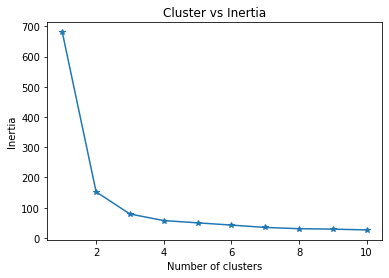

In [7]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=1000, tol=1e-04, random_state=1)
    km.fit(X)
    inertias.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertias, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Cluster vs Inertia")
plt.show()

Judging from the graph, the elbow curves when number of cluster is 3. Hence selecting n_clusters = 3.

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=1000, tol=1e-04, random_state=1)

km.fit(X_train)
y_pred = km.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

print("Accuracy(quality) of the model : ", accuracy_score(y_test, y_pred))

Accuracy(quality) of the model :  0.9333333333333333


In [10]:
print(leber.transform(['setosa', 'versicolor', 'virginica']))  # To identify which value is given to which species

[0 1 2]


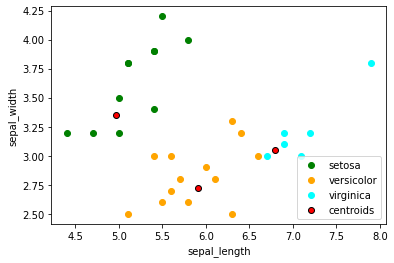

In [11]:
# plot the 3 clusters
plt.scatter( X_test[y_pred == 0].iloc[:, 0], X_test[y_pred == 0].iloc[:, 1], c='green', label='setosa')
plt.scatter( X_test[y_pred == 1].iloc[:, 0], X_test[y_pred == 1].iloc[:, 1], c='orange', label='versicolor')
plt.scatter( X_test[y_pred == 2].iloc[:, 0], X_test[y_pred == 2].iloc[:, 1], c='cyan', label='virginica')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='o', c='red',
            edgecolor='black', label='centroids')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()